# Natural Language Processing

In this homework assignment, you will tackle three distinct tasks involving text analysis:

1. Tweet Classification: Predict whether a specific tweet pertains to a natural disaster.
2. Bank Q&A Analysis: Deduce the user's query based on the text provided.
3. Fake News Classification: Determine whether a piece of news is true or false.

For educational reasons, we have retained all utility cells for data downloads. However, you can find everything you need in the corresponding GitHub repository subfolder.

# Solution Approach

Our solution approach will remain relatively consistent for all tasks:

1. Encode the text using a certain Language Model (LM), transforming each piece of text into a vector.
2. Implement a standard classification model (such as Logistic Regression, Random Forest, etc.) using these features.

Despite the varied nature of these tasks, you'll find that this approach provides a solid baseline solution for all three.

In [3]:
!pip install langchain
!pip install sentence-transformers
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install openTSNE
!pip install ipywidgets


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip3.9 install --upgrade pip
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:01
  Using cached numpy-1.24.3-cp311-cp311-macosx_10_9_x86_64.whl (19.8 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached scipy-1.10.1-cp311-cp311-macosx_10_9_x86_64.whl (35.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7

In [ ]:
# !pip install kaggle

In [ ]:
# !kaggle competitions download -c nlp-getting-started

In [ ]:
# !unzip nlp-getting-started.zip

# Task 1. Tweets

https://www.kaggle.com/competitions/nlp-getting-started


1. What is this dataset about?
2. Encode text with LM, what is the dimensionality of the resulting embeddings?
3. Plot TSNE describe the graph (run TSNE on 128 PCA components).
4. Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance
6. Explore the results (use out-of-fold predictions), find 3 False Positive tweets, which do not really look like a disaster, e.g.:
- https://twitter.com/shauniefish/status/649148030290006017 `I just checked in! \x89ÛÒ at On Fire on @ZomatoAUS #LoveFood http://t.co/9l5kqykrbG`

## 1.1 What is this dataset about?

In [1]:
import pandas as pd

In [93]:
df = pd.read_csv('./data/tweets/train.csv', index_col=0) # Use direct link to the github file if you are working in colab

In [94]:
df.head(9)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
14,NaN,NaN,There's an emergency evacuation happening now ...,1


To develop a machine learning model that can distinguish between tweets about real disasters and those that are not.

## 1.2 Encode text with LM, what is the dimensionality of the resulting embeddings?

In [4]:
from langchain.embeddings import HuggingFaceEmbeddings
from tqdm.notebook import tqdm

In [5]:
embeddings = HuggingFaceEmbeddings()
tweets_embeddings = []

for _, tweet in tqdm(df.iterrows()):
    vec = embeddings.embed_query(tweet.text)
    tweets_embeddings.append(vec)

0it [00:00, ?it/s]

In [81]:
import numpy as np
np.array(tweets_embeddings).shape

(7613, 768)

## 1.3 Plot TSNE describe the graph (run TSNE on 128 PCA components).

In [82]:
import numpy as np
from openTSNE import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
pca = PCA(128)
X_pca = pca.fit_transform(tweets_embeddings) 
tsne_embedding = TSNE().fit(X_pca)

In [84]:
print(pca.explained_variance_ratio_.sum())

0.7506437017103139


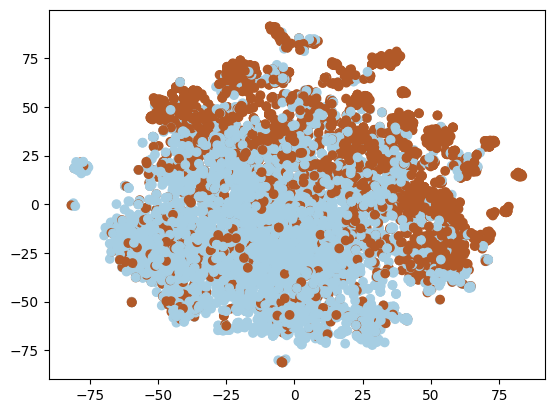

In [85]:
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df['target'], cmap='Paired');

From this plot we can see that data very mixed and it could be hard to devide labels. This could happends because we use only 75 percent of variance. This seems that general approches with dividing with hyperplain can be useless and we need more complex ones.

## 1.4 Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [98]:
reg = LogisticRegression()
predictions = cross_val_predict(reg, X_pca, df['target'])

In [99]:
print("Accuracy: ", accuracy_score(df['target'], predictions))
print("Roc AUC score: ", roc_auc_score(df['target'], predictions))
print("F1 score: ", f1_score(df['target'], predictions))
print("Precision: ", precision_score(df['target'], predictions))
print("Recall: ", recall_score(df['target'], predictions))

Accuracy:  0.8087481938788914
Roc AUC score:  0.8000228759610333
F1 score:  0.7683004455760661
Precision:  0.8011948224361102
Recall:  0.7380006114338122


## 1.5 Comment on model performance

If we plane to use our model for public alerts, we should use f1 score metric and precision, because we want to notify people only if we quite sure about our prediction. To describe our base model performance, we can note that it has quite bad f1 score and low precision. For better results, we should tune our model base on weighted f1 metric, where we should give more penalty to FP predictions.  Base on first 3 FP tweets, we can see that they are absolutely not like tweets about disasters. They have some keywords like ablaze and accidents, but note in context of disaster. For real use of these model, we should have some approve layer. So we can use model results as trigger and then check them by human, that will approve public notification. With 0.77 f1 score and no such big number of disasters in one time, this can work quite well.

FP tweets:
- On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE [http://t.co/qqsmshaJ3N](http://t.co/qqsmshaJ3N) #stlouis #caraccidentlawyer Speeding Among
- Top Causes of Teen Accidents [https://t.co/k4zoMOF319](https://t.co/k4zoMOF319) [https://t.co/S2kXVM0cBA](https://t.co/S2kXVM0cBA) Car Accident teeÛ_ 
- I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga

## 1.6     Explore the results (use out-of-fold predictions), find 3 False Positive tweets, which do not really look like a disaster, e.g.:

    https://twitter.com/shauniefish/status/649148030290006017 I just checked in! \x89ÛÒ at On Fire on @ZomatoAUS #LoveFood http://t.co/9l5kqykrbG


In [36]:
for i, (true, prediction) in enumerate(zip(df.target, predictions)):
    if true != prediction:
        print(true)
        print(prediction)
        print(df.iloc[i].text)
        print('======')

1
0
@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
0
1
On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
0
1
#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
1
0
BigRigRadio Live Accident Awareness
1
0
I was in a horrible car accident this past Sunday. I'm finally able to get around. Thank you GOD??
1
0
only had a car for not even a week and got in a fucking car accident .. Mfs can't fucking drive .
0
1
I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga
0
1
@crobscarla your lifetime odds of dying from an airplane accident are 1 in 8015.
0
1
@mickinyman @TheAtlantic That or they might be killed in an airplane accident in the night a car wreck! Politics at it's best.
0
1
My phone looks like it was in a car ship airplane accident. Terrible
0
1
Statistically I'm at more of risk

In [37]:
count = 0
for row, pred in zip(df[['target', 'text']].iloc, predictions):
    if pred == 1 and row['target'] == 0:
        print(row['text'])
        count += 1

    if count == 3:
        break

On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga


# Task 2. Bank Customers' Q&A system

https://huggingface.co/datasets/PolyAI/banking77


1. What is this dataset about?
2. What is the minimal and maximal median text length for different classes (e.g. median text length for `atm_support` is 35).
3. Encode text with LM
4. Run RF, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance
6. Analyze the errors of your model (use out-of-fold predictions), which two classes are mostly confused by your model?
7. (optional) plot a TSNE graph, with all observations, but color only two classes from the previous question. Make other points  color ligth gray, comment on the graph.

## 2.1 What is this dataset about?

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv')

In [102]:
df.head(3)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival


To facilitate the development of models for intent detection in the banking domain.

## 2.2 What is the minimal and maximal median text length for different classes?
e.g. median text length for atm_support is 35.

In [54]:
df_len = df.copy(deep=True)
df_len.text = df_len.text.apply(lambda x: len(x))
print("Min median length: " ,df_len.groupby('category').median().to_numpy().min())
print("Max median length: ", df_len.groupby('category').median().to_numpy().max())

Min median length:  30.0
Max median length:  66.0


In [55]:
df_len.groupby('category').median()

,text
category,
Refund_not_showing_up,47.5
activate_my_card,41.0
age_limit,41.0
apple_pay_or_google_pay,41.0
atm_support,35.0
...,...
virtual_card_not_working,44.0
visa_or_mastercard,37.0
why_verify_identity,45.0


## 2.3 Encode text with LM

In [56]:
embeddings = HuggingFaceEmbeddings()
bank_embeddings = []

for _, row in tqdm(df.iterrows()):
    vec = embeddings.embed_query(row.text)
    bank_embeddings.append(vec)

0it [00:00, ?it/s]

In [57]:
np.array(bank_embeddings).shape

(10003, 768)

## 2.4 Run RF, use 5 fold cross-validation, which metrics are appropriate for this task?

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
df['label_number'] = df['category'].replace(np.unique(df['category'].to_numpy()), range(77))

In [110]:
clf = RandomForestClassifier(10)
y_pred = cross_val_predict(clf, bank_embeddings, df['label_number'])
y_proba = cross_val_predict(clf, bank_embeddings, df['label_number'], method='predict_proba')

In [111]:
y_pred

array([12, 12, 13, ..., 25, 25, 25])

In [116]:
print("Accuracy: ", accuracy_score(df['label_number'], y_pred))
print("ROC AUC: ", roc_auc_score(df['label_number'], y_proba, multi_class='ovr'))
print("F1 score: ", f1_score(df['label_number'], y_pred, average='micro'))
print("Precision: ", precision_score(df['label_number'], y_pred, average='micro'))
print("Recall: ", recall_score(df['label_number'], y_pred, average='micro'))

Accuracy:  0.7981605518344497
ROC AUC:  0.9671221871620973
F1 score:  0.7981605518344497
Precision:  0.7981605518344497
Recall:  0.7981605518344497


## 2.5 Comment on model performance

How many classes in this dataset?

In [118]:
print(np.unique(df['category'].to_numpy()).shape)
print(np.unique(df['category'].to_numpy(), return_counts=True))

(77,)
(array(['Refund_not_showing_up', 'activate_my_card', 'age_limit',
       'apple_pay_or_google_pay', 'atm_support', 'automatic_top_up',
       'balance_not_updated_after_bank_transfer',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'beneficiary_not_allowed', 'cancel_transfer',
       'card_about_to_expire', 'card_acceptance', 'card_arrival',
       'card_delivery_estimate', 'card_linking', 'card_not_working',
       'card_payment_fee_charged', 'card_payment_not_recognised',
       'card_payment_wrong_exchange_rate', 'card_swallowed',
       'cash_withdrawal_charge', 'cash_withdrawal_not_recognised',
       'change_pin', 'compromised_card', 'contactless_not_working',
       'country_support', 'declined_card_payment',
       'declined_cash_withdrawal', 'declined_transfer',
       'direct_debit_payment_not_recognised', 'disposable_card_limits',
       'edit_personal_details', 'exchange_charge', 'exchange_rate',
       'exchange_via_app', 'extra_charge_on_statement

For this task, we can use the same metrics as for Task 1. But precision and recall are not so good here because we can't say what's better for us, FP or FN. F1 score and accuracy can be used. In our model they have nearly the same value and are not so good. So we should tune our models for better results. But we can note a good ROC-AUC score, which means that lables separate quite well.

## 2.6 Analyze the errors of your model (use out-of-fold predictions). Which two classes are confused by your model the most?

In [120]:
y_pred = cross_val_predict(clf, bank_embeddings, df['category'])

In [121]:
errors = dict()

for i,(true,predicted) in enumerate(zip(df.category, y_pred)):
    if true!=predicted:
        key = '-'.join(sorted([true,predicted]))
        if key in errors:
            errors[key] += 1
        else:
            errors[key] = 1
        print(true)
        print(predicted)
        print(df.iloc[i].text)
        print('======')

card_arrival
card_delivery_estimate
When did you send me my new card?
card_arrival
card_delivery_estimate
Do you have info about the card on delivery?
card_arrival
card_delivery_estimate
It's been a week since you sent my card and I still don't have it.
card_arrival
card_delivery_estimate
What is the expected delivery date for my card?
card_arrival
card_about_to_expire
Can I get an update on my replacement card?
card_arrival
activate_my_card
How can I check on the status of my new card?
card_arrival
country_support
Is there a way I can get my card expedited?
card_arrival
card_linking
I don't have my card after 1 week. What are my next steps?
card_arrival
Refund_not_showing_up
Was there a way for me to get tracking for that?
card_arrival
card_delivery_estimate
How long will it take for me to get my card?
card_arrival
card_delivery_estimate
maximum how many days get the courier?
card_arrival
balance_not_updated_after_cheque_or_cash_deposit
What's go on, where is my new card?
card_arrival

In [122]:
sorted(errors.items(), key=lambda x: x[1], reverse=True)

[('balance_not_updated_after_bank_transfer-transfer_not_received_by_recipient',
  40),
 ('card_payment_wrong_exchange_rate-wrong_exchange_rate_for_cash_withdrawal',
  36),
 ('beneficiary_not_allowed-failed_transfer', 32),
 ('balance_not_updated_after_bank_transfer-pending_transfer', 28),
 ('card_arrival-card_delivery_estimate', 27),
 ('card_payment_not_recognised-direct_debit_payment_not_recognised', 27),
 ('top_up_by_bank_transfer_charge-transfer_fee_charged', 22),
 ('balance_not_updated_after_bank_transfer-transfer_timing', 22),
 ('card_payment_fee_charged-extra_charge_on_statement', 21),
 ('top_up_failed-top_up_reverted', 21),
 ('pending_top_up-top_up_failed', 20),
 ('Refund_not_showing_up-request_refund', 19),
 ('pending_transfer-transfer_not_received_by_recipient', 18),
 ('exchange_via_app-fiat_currency_support', 17),
 ('card_not_working-declined_card_payment', 14),
 ('disposable_card_limits-get_disposable_virtual_card', 14),
 ('declined_transfer-failed_transfer', 14),
 ('Refund_n

In [131]:
if 'balance_not_updated_after_bank_transfer-transfer_timing' in errors:
    print('balance_not_updated_after_bank_transfer AND transfer_timing', errors['balance_not_updated_after_bank_transfer-transfer_timing'])
if 'card_arrival-lost_or_stolen_phone' in errors:
    print('card_arrival AND lost_or_stolen_phone', errors['card_arrival-lost_or_stolen_phone'])
if 'card_arrival-pin_blocked' in errors:
    print('card_arrival AND pin_blocked', errors['card_arrival-pin_blocked'])
if 'exchange_rate-receiving_money' in errors:
    print('exchange_rate AND receiving_money', errors['exchange_rate-receiving_money'])

balance_not_updated_after_bank_transfer AND transfer_timing 22


## 2.7 (optional) plot a TSNE graph, with all observations, but color only two classes from the previous question. Make other points color ligth gray, comment on the graph. Analyze model's errors.

In [135]:
tsne_embedding = TSNE().fit(np.array(bank_embeddings))

Text(0.5, 1.0, 'TSNE predictions')

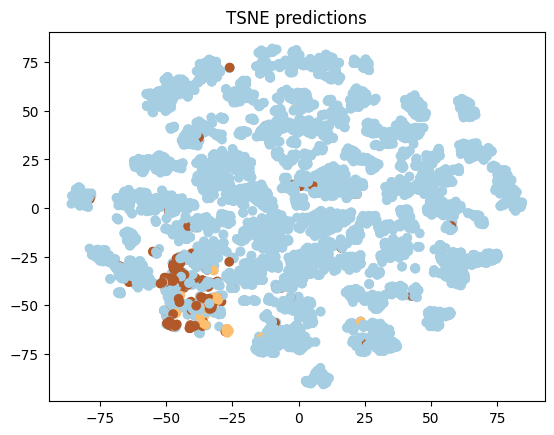

In [149]:
def replacer(x):
    if x == 'balance_not_updated_after_bank_transfer':
        return 2
    elif x == 'transfer_timing':
        return 1
    else:
        return 0
replacer_v = np.vectorize(replacer)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=replacer_v(y_pred), cmap='Paired');
plt.title("TSNE predictions")

Text(0.5, 1.0, 'TSNE true labels')

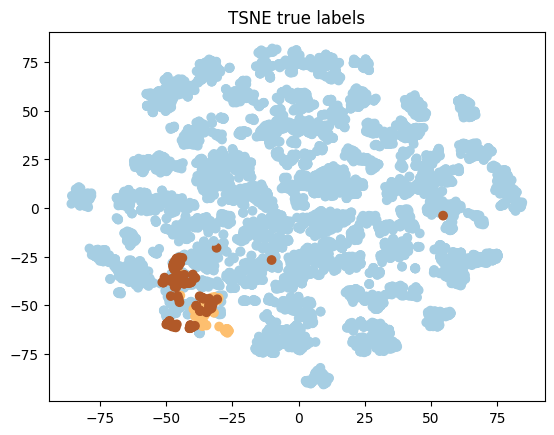

In [150]:
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df['category'].apply(replacer), cmap='Paired');
plt.title("TSNE true labels")

From graphs above, we can see that on true labels graph points of balance_not_updated_after_bank_transfer and transfer_timing are very mixed. The same we can find in the prediction graphs. This can mean that these labels are very similar. Actually, issues are quite similar. This lead to problems with predictions. 

# Task 3. Fake news

https://www.kaggle.com/datasets/jainpooja/fake-news-detection

1. What is this dataset about?
2. How many unique subjects are in True news and Fake news?
3. Encode text with LM
4. Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance, would you prefer a model with high Recall or with high Precision?
6. (optional) Analyze class distribution of the model. How many articles mentioning "Trump" are Fake? How many articles not mentioning "Trump" are Fake? Same question for "Obama". Can you say that this dataset is biased, explain?
7. (optional) using your model find False Positives which are actually True statements (news).


In [ ]:
# !kaggle datasets download -d jainpooja/fake-news-detection

In [ ]:
# !unzip fake-news-detection.zip

## 3.1 What is this dataset about?

In [155]:
df_fake = pd.read_csv('./data/fake_news/Fake.csv') # Use direct link to the github file if you are working in colab
df_true = pd.read_csv('./data/fake_news/True.csv')
df = pd.concat([df_fake, df_true])
df['target'] = [1]*df_fake.shape[0]+[0]*df_true.shape[0] # 1 if Fake, 0 o/w

In [156]:
df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


## 3.2 How many unique subjects are in True news and Fake news?

In [157]:
df['target'].value_counts()

target
1    23481
0    21417
Name: count, dtype: int64

## 3.3 Encode text with LM. 

due to dataset size it will take ~15 mins on average PC

In [159]:
embeddings = HuggingFaceEmbeddings()
news_embeddings = []

for _, row in tqdm(df.iterrows()):
    vec = embeddings.embed_query(row.text)
    news_embeddings.append(vec)

0it [00:00, ?it/s]

In [160]:
np.array(news_embeddings).shape

(44898, 768)

## 3.4 Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?

In [161]:
reg = LogisticRegression()
predictions = cross_val_predict(reg, news_embeddings, df['target'])

In [162]:
print("Accuracy: ", accuracy_score(df['target'], predictions))
print("Roc AUC score: ", roc_auc_score(df['target'], predictions))
print("F1 score: ", f1_score(df['target'], predictions))
print("Precision: ", precision_score(df['target'], predictions))
print("Recall: ", recall_score(df['target'], predictions))

Accuracy:  0.9536059512673171
Roc AUC score:  0.9536174869807235
F1 score:  0.9555436986447552
Precision:  0.9577308120133482
Recall:  0.9533665516800818


## 3.5 Comment on model performance, would you prefer a model with high Recall or with high Precision?

It depends a lot on the objective of the model. If we just want to flag potentially fake news as a recommendation, then recall is the preferred metric because we care more about finding more positive labels. When we block or remove fake news, precision is more important because we don't want to remove unnecessary news from the user and create a precedent for scandal. However, you can't completely abandon one of the metrics for the other, and you have to use both with different weights.

## 3.6 (optional) Analyze class distribution of the model. 

How many articles mentioning "Trump" are Fake? How many articles not mentioning "Trump" are Fake? Same question for "Obama". Can you say that this dataset is biased? Explain.

In [167]:
df['is_trump'] = df['text'].apply(lambda x: 'Trump' in x)
df['is_obama'] = df['text'].apply(lambda x: 'Obama' in x)

In [164]:
print(f"{(df[df['is_trump'] == 1]['target'] == 0).sum()}, {(df[df['is_trump'] == 0]['target'] == 0).sum()}")

9597, 11820


In [165]:
print(f"{(df[df['is_obama'] == 1]['target'] == 0).sum()}, {(df[df['is_obama'] == 0]['target'] == 0).sum()}")

4143, 17274


I don't get the sense that this dataset is biased since overall it felt like Trump was modeled more media and discussed. So it's more natural to have a high fake news process, although the 2X difference compared to Obama is troubling. I don't think we can conclude anything definitively from the current checks and further assessments are needed.

## 3.7 (optional) using your model find False Positives (news which have target "Fake" but are actually True).

In [173]:
for i, (true, prediction) in enumerate(zip(df.target, predictions)):
    if true==False and prediction==True:
        print(df.iloc[i].text)
        print('\n-----')

The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 

-----
The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Vanity Fair, which looks like it is on its last legs, is bending over backwards in apologizing for the 